In [ ]:
#IMPORTS

import CH_funcs as ch
import numpy as np
import matplotlib.pyplot as plt
import scipy
import importlib
import os
import cupy as cp
import shutil

Integrating...


MovieWriter ffmpeg unavailable; using Pillow instead.


Animating...0.0 %


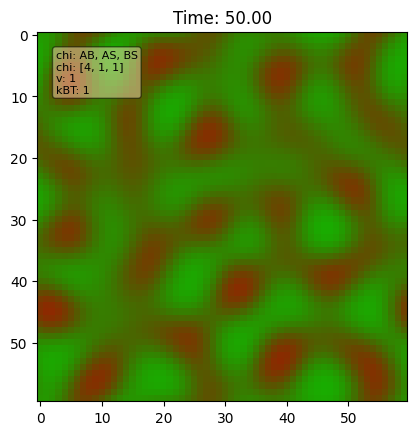

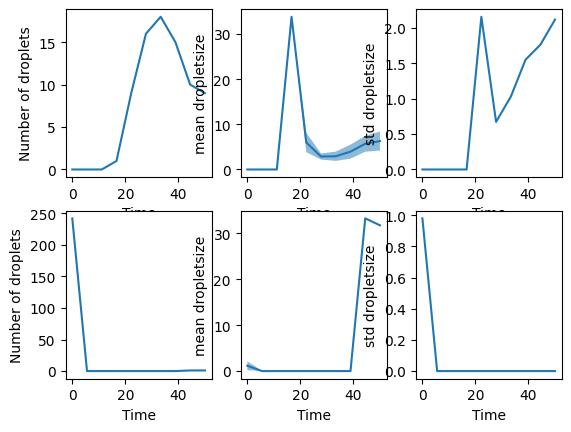

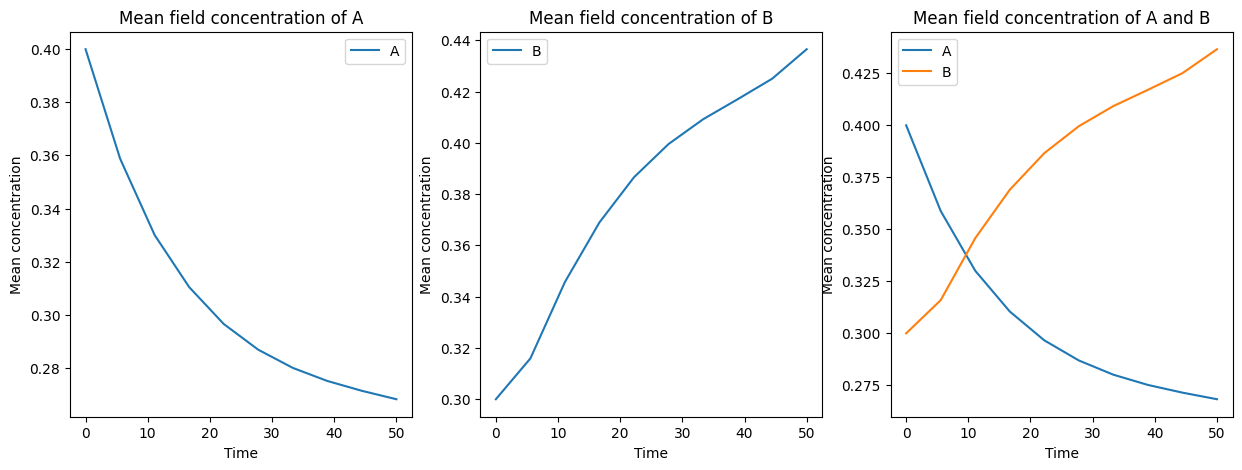

(None, <CH_funcs.integrator at 0x1fece6ef230>, None)

In [ ]:
#EXAMPLE TEST WINDOW
importlib.reload(ch)

#DIMENSIONS OF GRID (can be all dimensions)
dim = [60,60]

#Make pseudo-random grid (if not using one of the predefined initial conditions in /INITS)
grid0 = ch.gmm(dim=dim, mu1=0.4, mu2 = 0.3,sigma1=0.01,sigma2=0.01)

## predefined initial conditions
#OneDrop
# grid0 = np.load(os.path.join('INITS','OneDrop.npy')) 
# dim = [30,30] 

#OneDrop3D
# grid0 = np.load(os.path.join('INITS','OneDrop3D.npy'))
#dim = [30,30,30]




# !!!  useGPU = True requires cupy  !!!
#Change the second input if you want to have different grid spacing
derivfunc = ch.TimePartial(dim,dim, useGPU=False) 
#Takes a list of interactions parameters [chi_ab, chi_ac, chi_bc] and values for nu and kbt
derivfunc.setup_FH([4,1,1],1,1)

Anim = ch.integrator(grid0, derivfunc, dt= 0.001, t_end= 50, scheme= 'explicit', chemtype = 'destroy',klist=[0.08,0.04,0.08*8,0.24])

#set number of frames
Anim(N_frames=10)

#See next cell for how to save

In [ ]:
Anim.save('test_anim')
